# 패키지 로드

In [402]:
import pandas as pd
import numpy as np
import keras as keras

from sklearn.ensemble import *
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.datasets import make_classification


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop, SGD, Adamax
from keras.models import load_model

import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.metrics import confusion_matrix

# 데이터 준비, 정제

In [403]:
train_dataset=pd.read_csv('data/train_FINAL.csv',encoding='cp949')

In [405]:
X = train_dataset.drop('DLY', axis=1)
X2 = train_dataset.drop('DLY', axis=1)
y = train_dataset['DLY']

In [406]:
min_max=MinMaxScaler()

In [407]:
X=min_max.fit_transform(X) #변수 정규화

In [409]:
X=pd.DataFrame(X,columns=X2.columns)

In [410]:
X

,Y_2017,Y_2018,Y_2019,M_1,M_2,M_3,M_4,M_5,M_6,M_7,...,ODP_RATE,YEAR_RATE,MONTH_RATE,DAY_RATE,HOUR_RATE,IRR_RATE,DIST,PASS_ARP,PASS_ODP,HOLIDAY
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.903595,0.651705,0.878327,0.409646,0.162901,0.0,0.805654,0.827385,0.063858,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.678590,0.651705,0.878327,0.409646,0.128761,0.0,0.805654,0.067179,0.841470,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.678590,0.651705,0.878327,0.409646,0.176229,0.0,0.805654,0.067179,0.841470,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.903595,0.651705,0.878327,0.409646,0.260449,0.0,0.805654,0.827385,0.063858,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.678590,0.651705,0.878327,0.409646,0.261091,0.0,0.805654,0.067179,0.841470,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.734931,0.000000,0.454126,0.409646,0.243666,0.0,0.724382,0.950080,0.068630,0.0
987705,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.678590,0.000000,0.454126,0.409646,0.228254,0.0,0.724382,0.069273,0.943545,0.0
987706,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.678590,0.000000,0.454126,0.409646,0.081787,0.0,0.724382,0.069273,0.943545,0.0
987707,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.678590,0.000000,0.454126,0.409646,0.273977,0.0,0.724382,0.069273,0.943545,0.0


In [411]:
print("Total Dataset Shape")
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = np.nan_to_num(X_train)
print("Train / Test Set Size")
print(len(X_train), len(y_train), len(X_test), len(y_test))

Total Dataset Shape
(987709, 94)
Train / Test Set Size
691396 691396 296313 296313


In [412]:
np.random.seed(5)

In [413]:
LEARNING_RATE = 0.05
DROPOUT_RATIO = 0.3
BATCH_SIZE = 100
EPSILON = 0.01 

def delay_model(x_size, y_size):
    model = Sequential()
    model.add(Dense(30, activation='relu', input_shape=(x_size, )))
    Dropout(DROPOUT_RATIO)
    model.add(Dense(15, activation='relu'))
    Dropout(DROPOUT_RATIO)
    model.add(Dense(y_size, activation='sigmoid'))
    print(model.summary())
    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=LEARNING_RATE, epsilon=EPSILON),
                  metrics=['accuracy'])
    return model

In [435]:
model1 = delay_model(x_size=X_train.shape[1], y_size=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 30)                2850      
_________________________________________________________________
dense_39 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 16        
Total params: 3,331
Trainable params: 3,331
Non-trainable params: 0
_________________________________________________________________
None


In [436]:
history = model1.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=20, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Train on 691396 samples, validate on 296313 samples
Epoch 1/20
691396/691396 [==============================] - 20s 29us/step - loss: 0.3511 - acc: 0.8792 - val_loss: 0.3463 - val_acc: 0.8801
Epoch 2/20
691396/691396 [==============================] - 19s 28us/step - loss: 0.3465 - acc: 0.8794 - val_loss: 0.3447 - val_acc: 0.8793
Epoch 3/20
691396/691396 [==============================] - 20s 28us/step - loss: 0.3445 - acc: 0.8794 - val_loss: 0.3419 - val_acc: 0.8802
Epoch 4/20
691396/691396 [==============================] - 20s 29us/step - loss: 0.3431 - acc: 0.8793 - val_loss: 0.3393 - val_acc: 0.8804
Epoch 5/20
691396/691396 [==============================] - 21s 30us/step - loss: 0.3421 - acc: 0.8794 - val_loss: 0.3399 - val_acc: 0.8802
Epoch 6/20
691396/691396 [==============================] - 20s 29us/step - loss: 0.3413 - acc: 0.8795 - val_loss: 0.3406 - val_acc: 0.8805
Epoch 7/20
691396/691396 [==============================] - 20s 29us/step - loss: 0.3406 - acc: 0.8795 - val

In [439]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['acc'])
    plt.plot(h['val_acc'])
    plt.title('Training vs Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

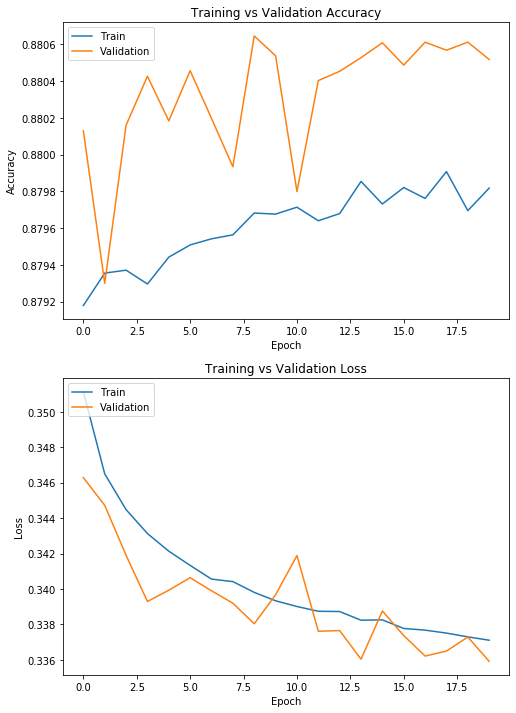

In [440]:
plot_hist(history.history, xsize=8, ysize=12)

# 모델적합

In [441]:
model1.save('model/predict_winrating.h1')

np.save('model/X_train.npy', X_train)
np.save('model/X_test.npy', X_test)
np.save('model/y_train.npy', y_train)
np.save('model/y_test.npy', y_test)

In [442]:
X_train_predicted = model1.predict(X_train)

In [443]:
X_test_predicted = model1.predict(X_test)

# 모델평가

## Train data

In [444]:
df=pd.DataFrame(X_train_predicted)
df2=pd.DataFrame(y_train)
df2=df2.reset_index()
df=pd.concat([df2,df], axis=1)
df.columns=['index', 'DLY', 'Predicted']
df['Predicted_DLY']=''
df

,index,DLY,Predicted,Predicted_DLY
0,483938,0.0,0.033692,
1,870284,0.0,0.036178,
2,167903,0.0,0.111077,
3,422978,1.0,0.180593,
4,367455,0.0,0.022135,
...,...,...,...,...
691391,96267,0.0,0.065083,
691392,677588,0.0,0.088281,
691393,405411,0.0,0.105681,
691394,736414,0.0,0.012747,


In [445]:
df.groupby('DLY').mean()

,index,Predicted
DLY,,
0.0,493378.311103,0.109102
1.0,496217.058740,0.174999


In [446]:
for i in range(len(df)):
    if df.Predicted[i]>0.174999:
        df['Predicted_DLY'][i] = 1
    else : 
        df['Predicted_DLY'][i] = 0

In [447]:
df.Predicted_DLY=df.Predicted_DLY.astype('int')

In [448]:
confusion_matrix(df.DLY, df.Predicted_DLY, labels=[0, 1])

array([[493396, 114582],
       [ 44533,  38885]], dtype=int64)

In [449]:
accuracy_score(df.DLY, df.Predicted_DLY) # Train set accuracy score

0.7698641588901295

## Validation Data

In [450]:
dft=pd.DataFrame(X_test_predicted)
dft2=pd.DataFrame(y_test)
dft2=dft2.reset_index()
dft=pd.concat([dft2,dft], axis=1)
dft.columns=['index', 'DLY', 'Predicted']
dft['Predicted_DLY']=''
dft

,index,DLY,Predicted,Predicted_DLY
0,232712,0.0,0.206668,
1,695143,0.0,0.180593,
2,768019,0.0,0.059812,
3,276765,0.0,0.109460,
4,506073,0.0,0.062337,
...,...,...,...,...
296308,58021,1.0,0.120763,
296309,553266,0.0,0.012666,
296310,570583,0.0,0.221676,
296311,522530,0.0,0.020225,


In [451]:
for i in range(len(dft)):
    if dft.Predicted[i]>0.174999:
        dft['Predicted_DLY'][i] = 1
    else : 
        dft['Predicted_DLY'][i] = 0

In [452]:
dft.Predicted_DLY=dft.Predicted_DLY.astype('int')

In [453]:
confusion_matrix(dft.DLY, dft.Predicted_DLY, labels=[0, 1])

array([[211261,  49533],
       [ 19358,  16161]], dtype=int64)

In [454]:
accuracy_score(dft.DLY, dft.Predicted_DLY) # Validation set accuracy score

0.7675059818502732

# Test set Fitting

In [466]:
test_dataset=pd.read_csv('data/test_FINAL.csv',encoding='cp949')

In [467]:
test_dataset

,Y_2017,Y_2018,Y_2019,M_1,M_2,M_3,M_4,M_5,M_6,M_7,...,YEAR_RATE,MONTH_RATE,DAY_RATE,HOUR_RATE,IRR_RATE,DIST,PASS_ARP,PASS_ODP,HOLIDAY,DLY
0,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.075110,0.119782,280.0,1212633.0,905134.0,0,NaN
1,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.047709,0.119782,280.0,1212633.0,905134.0,0,NaN
2,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.138391,0.119782,280.0,1212633.0,905134.0,0,NaN
3,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.151929,0.119782,280.0,1212633.0,905134.0,0,NaN
4,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.133148,0.119782,205.0,1212633.0,88657.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16071,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.139147,0.119782,113.0,80145.0,1164385.0,0,NaN
16072,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.152303,0.119782,113.0,1212633.0,83939.0,0,NaN
16073,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.167101,0.119782,113.0,1212633.0,83939.0,0,NaN
16074,0,0,1,0,0,0,0,0,0,0,...,0.094846,0.114672,0.131056,0.149497,0.119782,113.0,1212633.0,83939.0,0,NaN


In [468]:
X3 = test_dataset.drop('DLY', axis=1)
X4 = test_dataset.drop('DLY', axis=1)
y2 = test_dataset['DLY']

In [469]:
X3=min_max.fit_transform(X3) #변수 정규화
X3=pd.DataFrame(X3,columns=X4.columns)

In [470]:
X3

,Y_2017,Y_2018,Y_2019,M_1,M_2,M_3,M_4,M_5,M_6,M_7,...,ODP_RATE,YEAR_RATE,MONTH_RATE,DAY_RATE,HOUR_RATE,IRR_RATE,DIST,PASS_ARP,PASS_ODP,HOLIDAY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.778953,0.0,0.0,0.673862,0.230637,0.0,0.757447,1.000000,0.777349,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.778953,0.0,0.0,0.673862,0.001464,0.0,0.757447,1.000000,0.777349,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.778953,0.0,0.0,0.673862,0.759889,0.0,0.757447,1.000000,0.777349,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.778953,0.0,0.0,0.673862,0.873110,0.0,0.757447,1.000000,0.777349,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.734931,0.0,0.0,0.673862,0.716038,0.0,0.438298,1.000000,0.076141,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.678590,0.0,0.0,0.673862,0.766210,0.0,0.046809,0.066092,1.000000,0.0
16072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.821172,0.0,0.0,0.673862,0.876240,0.0,0.046809,1.000000,0.072089,0.0
16073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.821172,0.0,0.0,0.673862,1.000000,0.0,0.046809,1.000000,0.072089,0.0
16074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.821172,0.0,0.0,0.673862,0.852773,0.0,0.046809,1.000000,0.072089,0.0


In [472]:
X_realtest_predicted = model1.predict(X3) # 모형 적합

In [479]:
dfrt=pd.DataFrame(X_realtest_predicted)
dfrt.columns=['DLY_RATE']
dfrt['DLY']=''

In [486]:
for i in range(len(dfrt)):
    if dfrt.DLY_RATE[i]>0.174999:
        dfrt['DLY'][i] = 1
    else : 
        dfrt['DLY'][i] = 0

In [500]:
dfrt

,DLY_RATE,DLY
0,0.034507,0
1,0.014649,0
2,0.212029,1
3,0.281765,1
4,0.066047,0
...,...,...
16071,0.180593,1
16072,0.180593,1
16073,0.156475,0
16074,0.097655,0


In [490]:
result=pd.read_csv('data/AFSNT_DLY.csv',encoding='cp949')

In [514]:
result['ARP'][2]='ARP1'

In [515]:
result['DLY']=dfrt['DLY']
result['DLY_RATE']=dfrt['DLY_RATE']

In [516]:
result.to_csv('data/AFSNT_DLY.csv',encoding='cp949') # save